In [1]:
import numpy as np
from matplotlib import pyplot as plt
from time import time
%matplotlib inline
%load_ext line_profiler

In [2]:
from pyqg import qg_model
reload(qg_model)

<module 'pyqg.qg_model' from '/home/rpa/pyqg/pyqg/qg_model.pyc'>

In [3]:
tmax = 104000000
dt = 8000

In [4]:
m = qg_model.QGModel(nx=64, tmax=tmax, dt=dt)
lpo = %lprun -r -f qg_model.QGModel._step_forward -f qg_model.QGModel._forward_timestep m.run()
lpo.print_stats()

# m = qg_model.QGModel(nx=64, tmax=tmax, dt=dt, use_fftw=True)
# lpo = %lprun -r -f qg_model.QGModel._step_forward m.run()
# lpo.print_stats()

t=         8000000, tc=      1000: cfl=0.012980, ke=0.000000329
t=        16000000, tc=      2000: cfl=0.012986, ke=0.000000670
t=        24000000, tc=      3000: cfl=0.013041, ke=0.000001678
t=        32000000, tc=      4000: cfl=0.013171, ke=0.000004751
t=        40000000, tc=      5000: cfl=0.013188, ke=0.000014337
t=        48000000, tc=      6000: cfl=0.019282, ke=0.000044681
t=        56000000, tc=      7000: cfl=0.039853, ke=0.000141680
t=        64000000, tc=      8000: cfl=0.078191, ke=0.000412168
t=        72000000, tc=      9000: cfl=0.095031, ke=0.000524478
t=        80000000, tc=     10000: cfl=0.107669, ke=0.000561057
t=        88000000, tc=     11000: cfl=0.108817, ke=0.000552981
t=        96000000, tc=     12000: cfl=0.113811, ke=0.000527618
Timer unit: 1e-06 s

Total time: 10.0282 s
File: /home/rpa/pyqg/pyqg/model.py
Function: _step_forward at line 141

Line #      Hits         Time  Per Hit   % Time  Line Contents
   141                                               d

/home/rpa/.local/lib/python2.7/site-packages/line_profiler.py:298: UserWarning: Could not extract a code object for the object <method '_forward_timestep' of 'pyqg.kernel.PseudoSpectralKernel' objects>
  profile = LineProfiler(*funcs)


In [26]:
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=1)
%timeit m.ifft(m.ph); m.fft(m.q)
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=2)
%timeit m.ifft(m.ph); m.fft(m.q)
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=4)
%timeit m.ifft(m.ph); m.fft(m.q)
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=8)
%timeit m.ifft(m.ph); m.fft(m.q)

100 loops, best of 3: 15.9 ms per loop
100 loops, best of 3: 11.6 ms per loop
100 loops, best of 3: 10.1 ms per loop
100 loops, best of 3: 8.75 ms per loop


In [27]:
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=1)
%timeit m._invert()
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=2)
%timeit m._invert()
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=4)
%timeit m._invert()
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=8)
%timeit m._invert()

10 loops, best of 3: 19.9 ms per loop
100 loops, best of 3: 16.8 ms per loop
100 loops, best of 3: 14.3 ms per loop
100 loops, best of 3: 13.3 ms per loop


In [5]:
N = 2**10
print N
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=1)
%timeit m.fft_q_to_qh()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=2)
%timeit m.fft_q_to_qh()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=4)
%timeit m.fft_q_to_qh()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=8)
%timeit m.fft_q_to_qh()

1024
10 loops, best of 3: 24.3 ms per loop
100 loops, best of 3: 12.6 ms per loop
100 loops, best of 3: 6.73 ms per loop
100 loops, best of 3: 3.36 ms per loop


In [6]:
N = 2**10
print N
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=1)
%timeit m.ifft_qh_to_q()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=2)
%timeit m.ifft_qh_to_q()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=4)
%timeit m.ifft_qh_to_q()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=8)
%timeit m.ifft_qh_to_q()

1024
10 loops, best of 3: 28.7 ms per loop
100 loops, best of 3: 17.4 ms per loop
100 loops, best of 3: 10.3 ms per loop
100 loops, best of 3: 7.08 ms per loop


In [4]:
N = 2**10
print N
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=1)
%timeit m._invert()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=2)
%timeit m._invert()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=4)
%timeit m._invert()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=8)
%timeit m._invert()

1024
10 loops, best of 3: 120 ms per loop
10 loops, best of 3: 53.4 ms per loop
10 loops, best of 3: 31.3 ms per loop
10 loops, best of 3: 21.3 ms per loop


In [4]:
## the model main loop, want to test each piece
# self._invert()
# # find streamfunction from pv

# self._do_advection()
# # use streamfunction to calculate advection tendency

# self._do_friction()
# # apply friction 

# self._do_external_forcing()
# # apply external forcing

# self._calc_diagnostics()
# # do what has to be done with diagnostics

# self._forward_timestep()

steps = ['invert', 'do_advection', 'do_friction', 'calc_diagnostics', 'forward_timestep']
res = {}
pows_of_two = range(5,11)
num_threads = [1,2,4,8]
for s in steps:
    res[s] = np.zeros((len(pows_of_two), len(num_threads)))

nloops = 200
for j, pow2 in enumerate(pows_of_two):
    N = 2**pow2
    for i, ntd in enumerate(num_threads):
        m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=ntd)

        
        print N, ntd
        
        tic = time()
        for n in xrange(nloops):
            m._invert()
        toc = time() - tic
        res['invert'][j,i] = toc / nloops
        
        tic = time()
        for n in xrange(nloops):
            m._do_advection()
        toc = time() - tic
        res['do_advection'][j,i] = toc / nloops
        
        tic = time()
        for n in xrange(nloops):
            m._do_friction()
        toc = time() - tic
        res['do_friction'][j,i] = toc / nloops
        
        tic = time()
        for n in xrange(nloops):
            m._calc_diagnostics()
        toc = time() - tic
        res['calc_diagnostics'][j,i] = toc / nloops
        
        tic = time()
        for n in xrange(nloops):
            m._forward_timestep()
        toc = time() - tic
        res['forward_timestep'][j,i] = toc / nloops

32 1
32 2
32 4
32 8
64 1
64 2
64 4
64 8
128 1
128 2
128 4
128 8
256 1
256 2
256 4
256 8
512 1
512 2
512 4
512 8
1024 1
1024 2
1024 4
1024 8


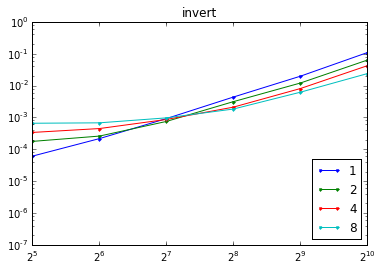

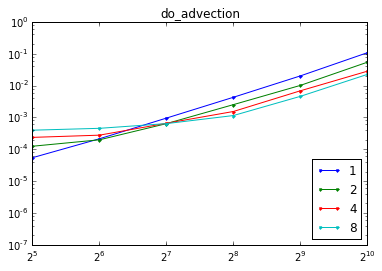

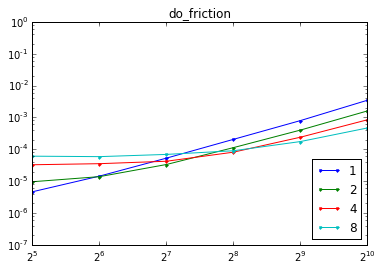

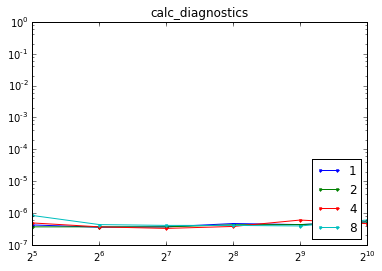

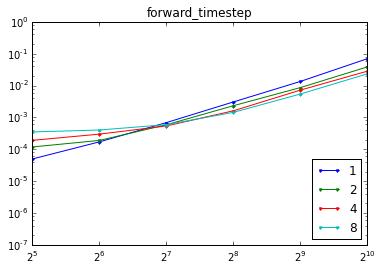

In [5]:
for k in steps:
    plt.figure()
    plt.loglog(np.exp2(pows_of_two), res[k], '.-', basex=2)
    plt.ylim([1e-7,1])
    plt.title(k)
    plt.legend(num_threads, loc='lower right')

In [6]:
m = qg_model.QGModel(nx=2**10, ntd=1)
#m._do_friction()
%timeit m._do_friction()
%timeit m._do_advection()

100 loops, best of 3: 3.23 ms per loop
10 loops, best of 3: 177 ms per loop


In [7]:
m = qg_model.QGModel(nx=2**10, ntd=8)
%timeit m._do_friction()
%timeit m._do_advection()

1000 loops, best of 3: 467 µs per loop
10 loops, best of 3: 25.4 ms per loop


In [5]:
pows_of_two = range(5,12)
num_threads = [1,2,4,8,16]
tres = np.zeros((len(pows_of_two), len(num_threads)))

nloops = 200
for j, pow2 in enumerate(pows_of_two):
    N = 2**pow2
    
    dt = 8000 * 64 / N
    tmax = 200*dt
    for i, ntd in enumerate(num_threads):
        print N, ntd
        m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=ntd)
        tic = time()
        m.run()
        toc = time() - tic
        tres[j,i] = toc
        

32 1
32 2
32 4
32 8
32 16
64 1
64 2
64 4
64 8
64 16
128 1
128 2
128 4
128 8
128 16
256 1
256 2
256 4
256 8
256 16
512 1
512 2
512 4
512 8
512 16
1024 1
1024 2
1024 4
1024 8
1024 16
2048 1
2048 2
2048 4
2048 8
2048 16


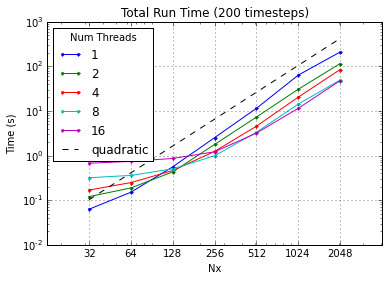

In [58]:
plt.figure()
po2 = np.exp2(pows_of_two).astype('int')
plt.loglog(po2, tres, '.-', basex=2)
plt.loglog(po2, 1e-4*po2**2, 'k--')
plt.xticks(po2, po2)
plt.xlim([16,2048*2])
plt.xlabel('Nx')
plt.ylabel('Time (s)')
plt.grid()
#plt.ylim([1e-7,1])
plt.title('Total Run Time (200 timesteps)')
plt.legend(num_threads + ['quadratic'], title='Num Threads', loc='upper left')

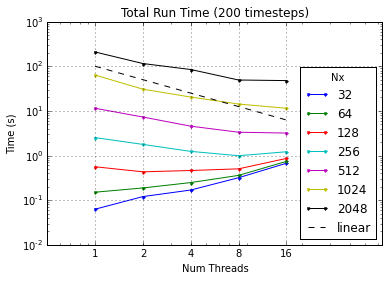

In [56]:
plt.figure()
plt.loglog(num_threads, tres.T, '.-', basex=2)
plt.loglog(num_threads, 100*np.array(num_threads).astype('float')**-1, 'k--')
plt.xticks(num_threads, num_threads)
plt.xlim([0.5,64])
plt.xlabel('Num Threads')
plt.ylabel('Time (s)')
plt.grid()
plt.title('Total Run Time (200 timesteps)')
plt.legend(list(np.exp2(pows_of_two).astype('int'))  + ['linear'],
           title='Nx', loc='lower right')

In [62]:
import socket
import platform

In [63]:
socket.gethostname()

'sverdrup.ldeo.columbia.edu'

In [65]:
platform.architecture()

('64bit', 'ELF')

In [66]:
platform.processor()

'x86_64'

In [67]:
platform.node()

'sverdrup.ldeo.columbia.edu'

('', ('', '', ''), '')